Data Exploration

I'm going to take a look at the photos and try to understand the dataset.

I'll take a look at the attributes given in the files, however I doubt that any of them will be helpful in this task.

I'll test out a few methods in generating image matting in order to train.

In [1]:
import os
from os import path
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from scipy.io import loadmat
from skimage import io
import imutils
from tqdm import tqdm

In [2]:
CURRENT_DIR = path.abspath(path.curdir)
FOLDER = '/[EG_code_data]_release/data/'
IMG_SIZE = (600,800)

urls = pd.read_csv(CURRENT_DIR + FOLDER + 'alldata_urls.txt',names=['name','url'],delimiter=' ')
crops = pd.read_csv(CURRENT_DIR + FOLDER + 'crop.txt',names=['name','leftx','lefty','rightx','righty'],delimiter=' ')
backgrounds = os.listdir(CURRENT_DIR + '/Backgrounds/')

In [6]:
for sample in tqdm(urls.T.iteritems()):
    
    try:
        og = io.imread(sample[1][1])
        crop = crops[crops['name']==sample[1][0]]
        og = og[crop['leftx'].values[0]:crop['lefty'].values[0],crop['rightx'].values[0]:crop['righty'].values[0],:]
        og = cv2.resize(og,IMG_SIZE)
        og = cv2.cvtColor(og, cv2.COLOR_BGR2RGB)
        cv2.imwrite(os.path.join(CURRENT_DIR,'og','og_' + sample[1][0].split('.')[0] + '.png'),og)

        if np.random.uniform(0,1)>0.9:
            traintest = 'test'
        else:
            traintest = 'train'

        for i in range(np.random.randint(10,20)):      
        

            # Grabbing the image and mask from the dataset
            image = og.copy()
            mask = np.asarray(loadmat(CURRENT_DIR + FOLDER + '/images_mask/' + sample[1][0].split('.')[0] + '_mask.mat')['mask'])
            
            # Performing image augmentation on the data
            if np.random.randint(0,2)==0:
                image = cv2.flip(image,1)
                mask = cv2.flip(mask,1)
                
            rotation = np.random.randint(-30,31)
            image = imutils.rotate(image, rotation)
            mask = imutils.rotate(mask,rotation)
            

            
            brightness = np.random.uniform(0,1)
            image = np.power(image,brightness+0.5)
            image *= 255/np.max(image)


    
            w1 = np.random.randint(0.25*IMG_SIZE[0])
            w2 = IMG_SIZE[0]-np.random.randint(0.25*IMG_SIZE[0])
            h1 = np.random.randint(0.25*IMG_SIZE[1])
            h2 = IMG_SIZE[1]-np.random.randint(0.25*IMG_SIZE[1])
            
            image = image[w1:w2,h1:h2]            
            image = cv2.resize(image,IMG_SIZE)
            mask = mask[w1:w2,h1:h2]
            mask = cv2.resize(mask,IMG_SIZE)
            inv_mask = cv2.bitwise_not(mask) - 254
            
            if i >2:

                background = cv2.imread(CURRENT_DIR + '/Backgrounds/' + np.random.choice(backgrounds))
                background = cv2.resize(background,IMG_SIZE)
#                 background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
                background = np.power(background,brightness+0.5)
                background *= 255/np.max(background)
                masked_image = cv2.bitwise_and(image,image,mask=mask).astype(np.uint8)
                masked_background = cv2.bitwise_and(background,background,mask=inv_mask).astype(np.uint8)
                data = cv2.add(masked_background,masked_image)
                
            else:
                data = image.copy()
            
            # Saving the results to a file

            mask *= 255
            ret, thresh = cv2.threshold(mask,127,255,0)
            contours,hierarchy = cv2.findContours(mask, 1, 2)
            trimap = cv2.drawContours(np.zeros((IMG_SIZE[1],IMG_SIZE[0])), contours, -1,(255),thickness=-1)
            trimap = cv2.drawContours(trimap,contours,-1,(127),thickness=15)
            kernel = np.ones((5,5),np.uint8)
            trimap = cv2.erode(trimap,kernel,iterations=3)
            trimap = cv2.dilate(trimap,kernel,iterations=3)


            cv2.imwrite(os.path.join(CURRENT_DIR,'data',traintest,'data_' + sample[1][0].split('.')[0] + '_' + str(i+1) + '.png'),data)
            cv2.imwrite(os.path.join(CURRENT_DIR,'matte',traintest,'matte_' + sample[1][0].split('.')[0] + '_' + str(i+1) + '.png'),mask)
            cv2.imwrite(os.path.join(CURRENT_DIR,'trimap',traintest,'trimap_' + sample[1][0].split('.')[0] + '_' + str(i+1) + '.png'),trimap)


    except Exception as e:

#             print(e)
        pass
    
#     break


print(len(os.listdir(CURRENT_DIR + '/data/train/')) + len(os.listdir(CURRENT_DIR + '/data/test/'))) 







0it [00:00, ?it/s]


1it [00:03,  3.01s/it]


2it [00:05,  2.71s/it]


3it [00:07,  2.61s/it]


4it [00:10,  2.71s/it]


5it [00:12,  2.48s/it]


6it [00:15,  2.56s/it]


7it [00:17,  2.58s/it]


8it [00:19,  2.37s/it]


9it [00:22,  2.44s/it]


10it [00:25,  2.64s/it]


11it [00:27,  2.67s/it]


12it [00:28,  1.94s/it]


13it [00:30,  2.17s/it]


14it [00:35,  2.78s/it]


15it [00:38,  3.03s/it]


16it [00:41,  3.05s/it]


17it [00:44,  2.79s/it]


18it [00:44,  2.01s/it]


19it [00:47,  2.25s/it]


20it [00:49,  2.28s/it]


21it [00:52,  2.55s/it]


22it [00:55,  2.65s/it]


23it [00:58,  2.81s/it]


24it [01:00,  2.63s/it]


25it [01:03,  2.72s/it]


26it [01:06,  2.79s/it]


27it [01:10,  3.03s/it]


28it [01:12,  2.92s/it]


29it [01:15,  2.95s/it]


30it [01:17,  2.64s/it]


31it [01:20,  2.77s/it]


32it [01:24,  2.95s/it]


33it [01:27,  3.02s/it]


34it [01:31,  3.21s/it]


35it [01:34,  3.28s/it]


36it [01:37,  3.22s/it]


37it [01:43,  3.87s/it]


38it [01:43,  2.78s/it]

KeyboardInterrupt: 

In [53]:
print(IMG_SIZE[0])

800


5000 Alley
2500 Arch
2500 Cabin
5000 Beach
2500 Desert
2500 Creek

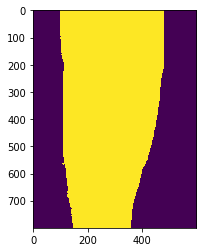

In [104]:
plt.imshow(mask)

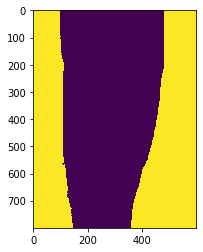

In [103]:
plt.imshow(inv_mask)

In [98]:
test = jokes.astype(np.uint8)
masked_background = cv2.bitwise_and(background,background,mask=np.where(test==1,0,1)).astype(np.uint8)

error: OpenCV(4.2.0) ..\modules\core\src\arithm.cpp:250: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


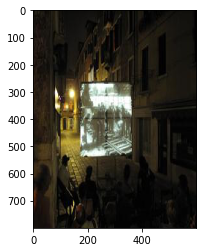

In [93]:
plt.imshow(background)

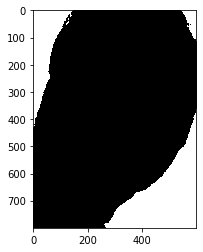

In [96]:
plt.imshow(np.where(jokes==1,0,1),cmap='gray')